In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PREPROCESSING

In [5]:
data = pd.read_csv('C:\\Users\\g7gay\\OneDrive\\Desktop\\Projects\\Gold_Price_Prediction\\gld_price_data.csv')

In [6]:
data.shape

(2290, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

CORRELATION 

    1. Positive Correlation
    2. Negative Correlation

In [9]:
correlation = data.corr()

<AxesSubplot:>

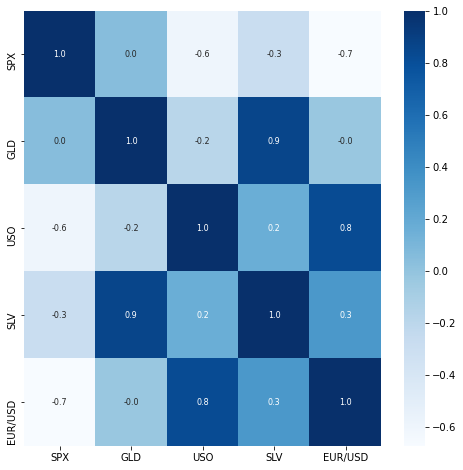

In [12]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# correation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


c:\Users\g7gay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

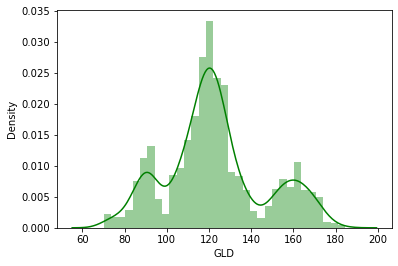

In [15]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'], color='green')

SPLITTING THE FEATURES AND TARGETS

In [16]:
x = data.drop(['Date','GLD'], axis=1)
y = data['GLD']

SPLITTING INTO TRAIN AND TEST

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

MODEL TRAINING

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

MODEL EVALUATION

In [20]:
# prediction on test data

test_data_prediction = regressor.predict(x_test)


In [22]:
# R squared error

error = metrics.r2_score(y_test,test_data_prediction)

print('R squared error : ', error)

R squared error :  0.9896402698306858


COMPARING THE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT

In [23]:
y_test = list(y_test)

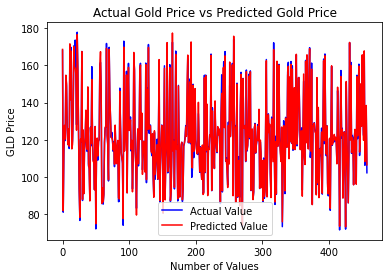

In [25]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Gold Price vs Predicted Gold Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()